In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df.info()
df['job_skills']=df['job_skills'].apply(lambda salary: ast.literal_eval(salary) if pd.notna(salary) else salary)

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [16]:
df_Da_ind=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='India')].copy()
df_Da_ind=df_Da_ind.dropna(subset='salary_year_avg')


In [19]:
df_Da_ind=df_Da_ind.explode('job_skills')
df_Da_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,python,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,sql,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,aws,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,azure,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,looker,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,powerpoint,"{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,power bi,"{'analyst_tools': ['power bi', 'tableau']}"
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,tableau,"{'analyst_tools': ['power bi', 'tableau']}"


In [42]:
df_DA_ind_group=df_Da_ind.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_pay=df_DA_ind_group.sort_values(by='median',ascending=False).head(10)
df_top_skills=df_DA_ind_group.sort_values(by='count',ascending=False).head(10)
df_top_skills=df_top_skills.sort_values(by='median',ascending=False)
df_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


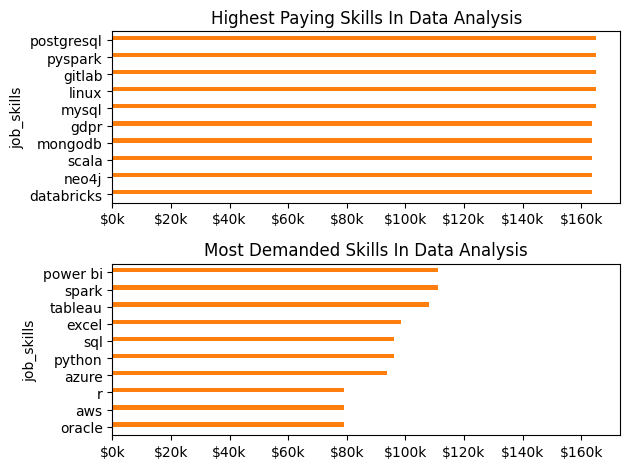

In [51]:
fig,ax=plt.subplots(2,1)
df_top_pay[::-1].plot(kind='barh',ax=ax[0],legend=False)
ax[0].set_title('Highest Paying Skills In Data Analysis')
ax[0].xaxis.set_major_formatter(lambda x,pos: f'${int(x/1000)}k')
df_top_skills[::-1].plot(kind='barh',ax=ax[1],legend=False)
ax[1].set_title('Most Demanded Skills In Data Analysis')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x,pos: f'${int(x/1000)}k')
fig.tight_layout()


In [60]:
import seaborn as sns

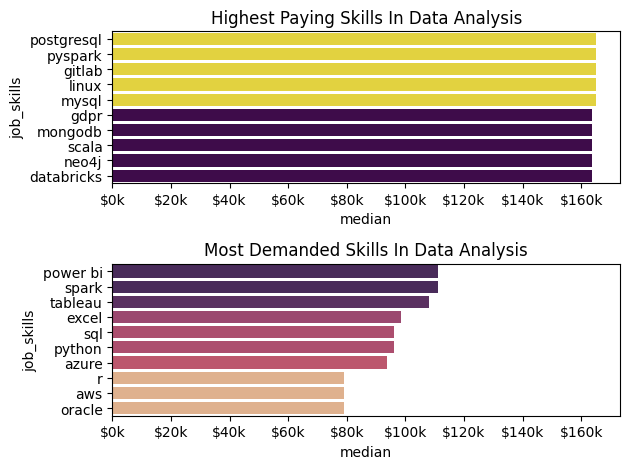

In [78]:
fig,ax=plt.subplots(2,1)
#df_top_pay[::-1].plot(kind='barh',ax=ax[0],legend=False)
sns.barplot(data=df_top_pay,x='median',y=df_top_pay.index,hue='median',ax=ax[0],legend=False,palette='viridis')
ax[0].set_title('Highest Paying Skills In Data Analysis')
ax[0].xaxis.set_major_formatter(lambda x,pos: f'${int(x/1000)}k')
#df_top_skills[::-1].plot(kind='barh',ax=ax[1],legend=False)
sns.barplot(data=df_top_skills,x='median',y=df_top_skills.index,hue='median',ax=ax[1],legend=False,palette='flare')
ax[1].set_title('Most Demanded Skills In Data Analysis')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x,pos: f'${int(x/1000)}k')
fig.tight_layout()
